# Studenten

1. Lees het bestand "studentenScores.csv" in. Hierin staan de scores van 100 studenten op bepaalde vakken


In [175]:
import pandas as pd
import numpy as np

studentenScores = pd.read_csv("data/studentenScores.csv")
display(studentenScores)

,vak1,vak2,vak3,vak4,vak5,vak6,vak7,vak8,vak9,score
0,13,9,17,2,17,1,0,14,18,gemiddeld
1,10,13,5,20,20,14,4,2,10,goed
2,13,4,2,19,3,9,16,13,7,goed
3,8,3,17,7,16,10,15,9,8,slecht
4,1,12,13,2,9,10,2,2,13,slecht
...,...,...,...,...,...,...,...,...,...,...
95,14,10,15,4,4,6,10,13,8,gemiddeld
96,16,10,16,1,8,11,19,0,13,gemiddeld
97,0,20,9,7,13,11,18,10,9,slecht
98,14,15,16,9,4,8,10,18,9,gemiddeld


2. In de file staan de punten van 100 studenten voor 9 vakken en een beoordeling in het algemeen door de docenten op basis van deze punten en hun werkattitude. Bereken de afstand tussen de eerste student (student0) en de tweede student (student1) voor deze 9 vakken op de volgende manieren:
    *  euclidisch
    *  gestandaardiseerd euclidisch
    *  manhattan



In [192]:
from scipy.spatial.distance import cdist

# Verwijder de kolom met de score
studentpunten = studentenScores.drop('score', axis=1)

# Selecteer de punten van student 0 en student 1
punt_student0 = studentpunten.iloc[0]
punt_student1 = studentpunten.iloc[1]

# Bereken de afstanden tussen student 0 en student 1
afstand_euclidisch = cdist([punt_student0], [punt_student1], metric='euclidean')
afstand_gestandaardiseerd = cdist([punt_student0], [punt_student1], metric='seuclidean')
afstand_manhattan = cdist([punt_student0], [punt_student1], metric='cityblock')

# Print de resultaten
print("De afstanden tussen student 0 en student 1 zijn:")
print(f"Euclidische afstand: {afstand_euclidisch}")
print(f"Gestandaardiseerde Euclidische afstand: {afstand_gestandaardiseerd}")
print(f"Manhattan afstand: {afstand_manhattan}")

De afstanden tussen student 0 en student 1 zijn:
Euclidische afstand: [[29.9165506]]
Gestandaardiseerde Euclidische afstand: [[4.24264069]]
Manhattan afstand: [[77.]]


3. We zoeken 4 clusters in deze set. Kies volgende centroids:
    *  (9, 3, 14, 1, 6, 10, 10, 15,11)
    *  (12, 18, 9, 5, 18, 1, 3, 18,12)
    *  (6, 15, 13, 18, 9, 15, 20, 18,13)
    *  (5, 4, 7, 18, 20, 17, 1, 15,14)



> Bereken nu de euclidische afstand van student met rangnummer 1 (dit is dan de tweede student eigenlijk want we beginnen te tellen bij 0) , 10, 20 en 30 tot deze centroids.
TIP: Maak eerst een dataframe van de centroids en dan een dataframe van de 4 studenten.





In [177]:
import pandas as pd
from scipy.spatial.distance import cdist

# Gegeven centroids
centroids = pd.DataFrame({
    'Vak1': [9, 12, 6, 5],
    'Vak2': [3, 18, 15, 4],
    'Vak3': [14, 9, 13, 7],
    'Vak4': [1, 5, 18, 18],
    'Vak5': [6, 18, 9, 20],
    'Vak6': [10, 1, 15, 17],
    'Vak7': [10, 3, 20, 1],
    'Vak8': [15, 18, 18, 15],
    'Vak9': [11, 12, 13, 14]
})

# Selecteer de studenten met rangnummer 1, 10, 20 en 30
studenten_selectie = studentpunten.loc[[1, 10, 20, 30]]

# Bereken de euclidische afstand tussen de geselecteerde studenten en de centroids
afstanden = cdist(studenten_selectie, centroids, metric='euclidean')

# Maak een DataFrame van de afstanden met juiste index en kolomnamen
afstanden_df = pd.DataFrame(afstanden, index=[1, 10, 20, 30], columns=['-> Centroid 1', '-> Centroid 2', '-> Centroid 3', '-> Centroid 4'])

# Print de resultaten
print("Euclidische afstanden van studenten tot de centroids:")
display(afstanden_df)

Euclidische afstanden van studenten tot de centroids:


,-> Centroid 1,-> Centroid 2,-> Centroid 3,-> Centroid 4
1,31.000000,26.532998,27.037012,17.804494
10,16.431677,13.892444,20.976177,19.183326
20,19.313208,31.843367,29.849623,31.890437
30,21.977261,21.725561,21.470911,22.781571



4. Bij welke centroid zou je deze studenten indelen?

In [178]:
print(afstanden_df.idxmin(axis=1))

1     -> Centroid 4
10    -> Centroid 2
20    -> Centroid 1
30    -> Centroid 3
dtype: object


5. Bepaal de categorieën (clusters) van iedere student a.d.h.v. het K-means algoritme. Hoeveel studenten zitten er in iedere categorie?

In [179]:
# K-means algoritme
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, n_init='auto', random_state=42, max_iter=100)
model.fit(studentpunten)
clusterstudent = pd.DataFrame(model.labels_, columns=["Cluster"], index=["Student" + str(i) for i in range(0, len(studentpunten))])
df = pd.DataFrame(clusterstudent).value_counts()
display(df)

Cluster
1          32
3          29
0          21
2          18
Name: count, dtype: int64


6. Voeg een kolom toe waarin de categorie staat. Gebruik DecisionTreeClassifier om een beslissingsboom op te stellen.

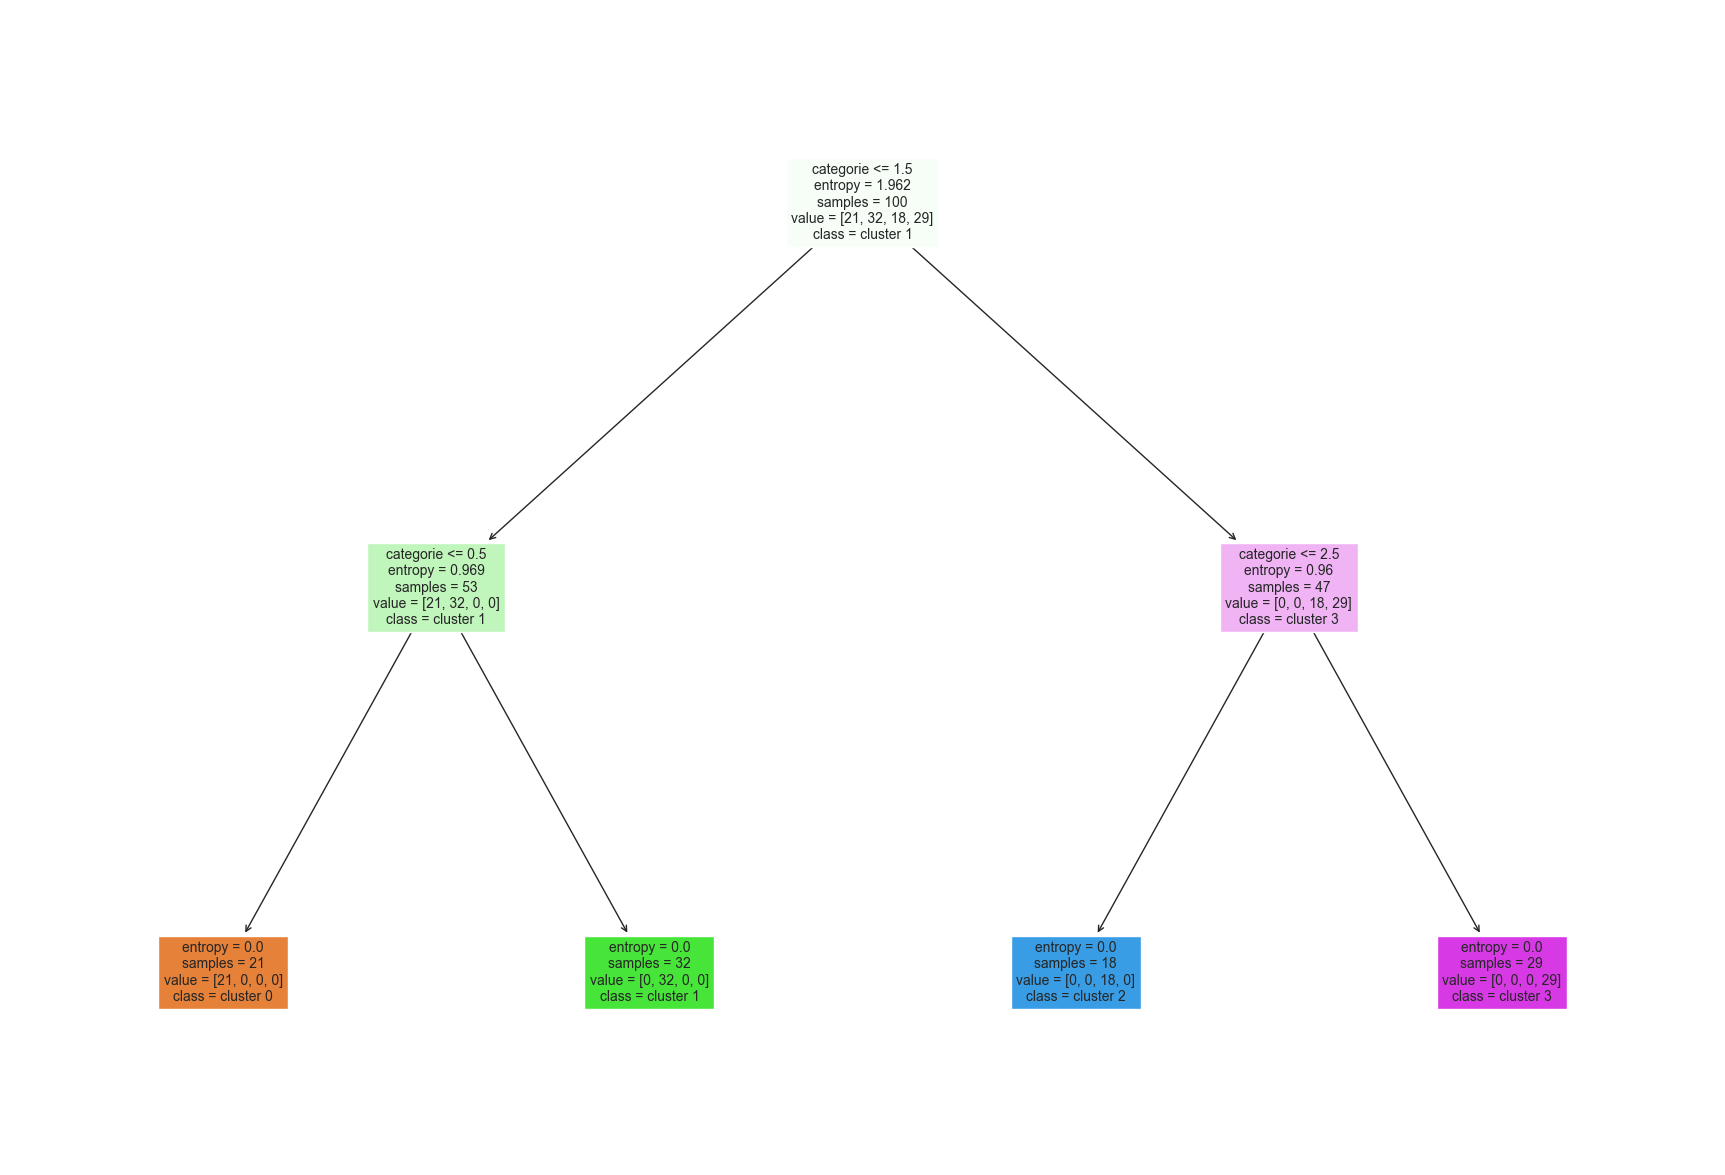

In [180]:
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

studentpunten['categorie'] = model.labels_
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
classifier.fit(studentpunten, studentpunten['categorie'])

# Plot tree
plt.figure(figsize=(22, 15))  # set plot size (denoted in inches)
tree.plot_tree(classifier, feature_names=studentpunten.columns, class_names=['cluster {}'.format(i) for i in np.unique(model.labels_)], filled=True, fontsize=10)
plt.show()

7. Bereken voor iedere categorie ook de gemiddelden over de 9 vakken. Hoe zou je deze 4 categorieën typeren?


In [181]:
gemiddelden = studentpunten.groupby('categorie').mean().sum(axis=1) / 9
display(gemiddelden)

categorie
0     9.576720
1    11.069444
2    10.814815
3     8.367816
dtype: float64

8. In welke categorie valt een nieuwe student met de volgende punten: (10, 15, 12, 11, 13, 14, 9, 10,11)?



In [189]:
display(classifier.predict(pd.DataFrame([[0, 10, 15, 12, 11, 13, 14, 9, 10, 11]], columns=studentpunten.columns)))

# columns=studentpunten.columns is niet nodig, maar zorgt ervoor dat de kolommen in de juiste volgorde staan

array([3])